# SVM parameter search

Duncan Tulimieri 

In [1]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time 
import seaborn as sns
# personal classesß
from ProcessData import ProcessForestData
import savingfigR as sf 

In [2]:
class pSVM(ProcessForestData):

    C_param_guesses = np.linspace(3, 30, 20)
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']

    def __init__(self):
        # method calls 
        self.X_train, self.X_test, self.y_train, self.y_test = self.load_data(perform_scale=True, sub_data_section='')
        # Raw data 
        start = time.time()
        SVM_trained_opt, mean_test_score = self.optimize_SVM_params(self.X_train, self.y_train, self.C_param_guesses, self.kernels)
        SVM_score = self.score_SVM(SVM_trained_opt,self.X_test, self.y_test)
        self.param_plot_SVM(mean_test_scores=mean_test_score)
        end = time.time()
        print(f'Raw data SVM optimal score = {SVM_score}') 
        print(f'Time taken = {end-start}')

    # model 
    def train_SVM(self, X, y, C=1, kernel='rbf'):
        return SVC(kernel=kernel, C=C).fit(X, y)

    def score_SVM(self, trained_SVM_model, X_test, y_test):
        return trained_SVM_model.score(X_test, y_test)

    def predict_SVM(self, trained_SVM_model, X_test):
        return trained_SVM_model.predict(X_test)

    # parameter estimation 
    def optimize_SVM_params(self, X_train, y_train, C_options=C_param_guesses, kernel_options=kernels, cv=10, scoring='accuracy'):
        SVM_raw = SVC()
        cv_train_model = GridSearchCV(SVM_raw, param_grid={'C': C_options, 'kernel':kernel_options}, cv=cv, scoring=scoring).fit(X_train, y_train)
        mean_test_score = cv_train_model.cv_results_['mean_test_score']
        print(f'Best SVM parameters: C = {cv_train_model.best_params_["C"]}, kernel = {cv_train_model.best_params_["kernel"]}')
        best_model = self.train_SVM(X_train, y_train, C=cv_train_model.best_params_["C"], kernel=cv_train_model.best_params_["kernel"])
        return best_model, mean_test_score.reshape(len(self.C_param_guesses), len(self.kernels))

    # visualization
    def param_plot_SVM(self, mean_test_scores):
        plt_styles, bgs = ['seaborn-bright', 'dark_background'], ['_wbg', '_kbg']
        for bg, style in zip(bgs, plt_styles):
            with plt.style.context(style):
                fig = plt.figure()
                ax = sns.heatmap(mean_test_scores, xticklabels=self.kernels, yticklabels=np.round(self.C_param_guesses,3), cbar_kws={'label':'Mean Test Score'})
                ax.set_xlabel('Kernel')
                ax.set_yticks(ax.get_yticks()[::2])        
                ax.set_ylabel('C')
                ax.set_title('CV Scores for SVM parameters')
                plt.show()
                sf.best_save(fig, 'SVM_params'+bg)
        

# SVM

/Users/duncan/opt/anaconda3/envs/CoverTypeProject/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Best SVM parameters: C = 12.947368421052632, kernel = sigmoid


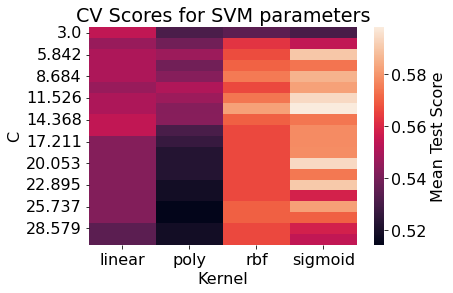

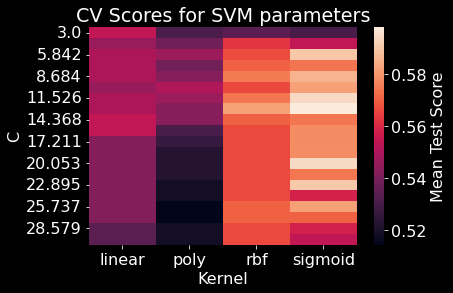

Raw data SVM optimal score = 0.5906040268456376
Time taken = 12.570503950119019


In [3]:
testSVM = pSVM()